In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


# LOADING THE DATASET

In [3]:
df = pd.read_csv ("/kaggle/input/apple-quality/apple_quality.csv")

# feature engineering

In [4]:
df = df.drop(columns="A_id")

In [5]:
df.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [7]:
df = df.dropna()

In [8]:
df = df.astype({'Acidity': 'float64'})

In [9]:
unique_values = df['Quality'].unique()
print(unique_values)

['good' 'bad']


In [10]:
df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0})


/tmp/ipykernel_34/23426002.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0})


In [11]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


In [12]:
import matplotlib as plt

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Acidity'}>,
        <Axes: title={'center': 'Quality'}>, <Axes: >]], dtype=object)

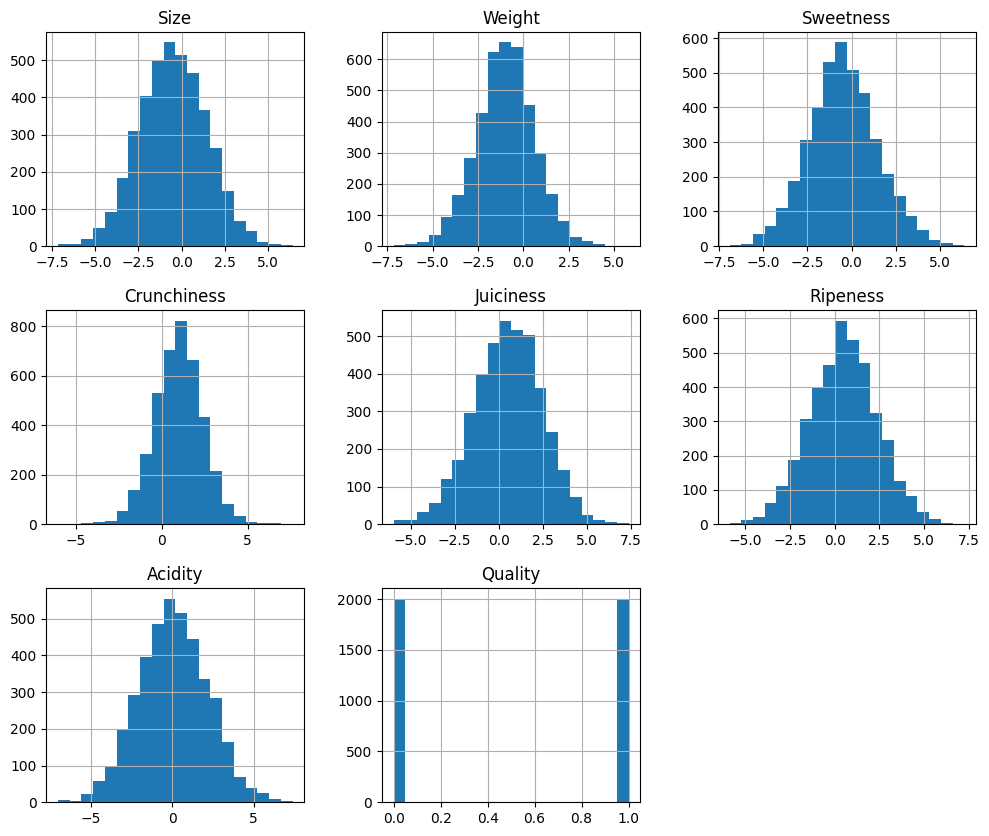

In [13]:
# Assuming df is your DataFrame
df.hist(figsize=(12, 10), bins=20)

All columns seem to follow a normal distribution, the data is already cleaned so let's focus on the model

In [14]:
df.describe().T.style.background_gradient(axis=0, cmap='cubehelix')

,count,mean,std,min,25%,50%,75%,max
Size,4000.000000,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.000000,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.000000,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.000000,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.000000,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.000000,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.000000,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736
Quality,4000.000000,0.501000,0.500062,0.000000,0.000000,1.000000,1.000000,1.000000


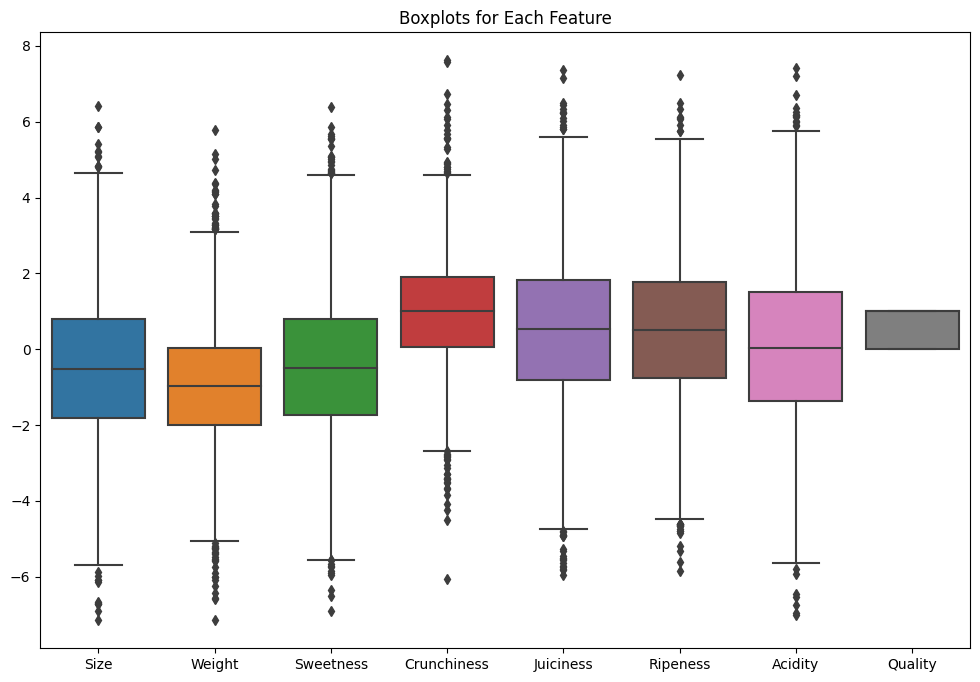

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplots for Each Feature")
plt.show()

# PAIR PLOT 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

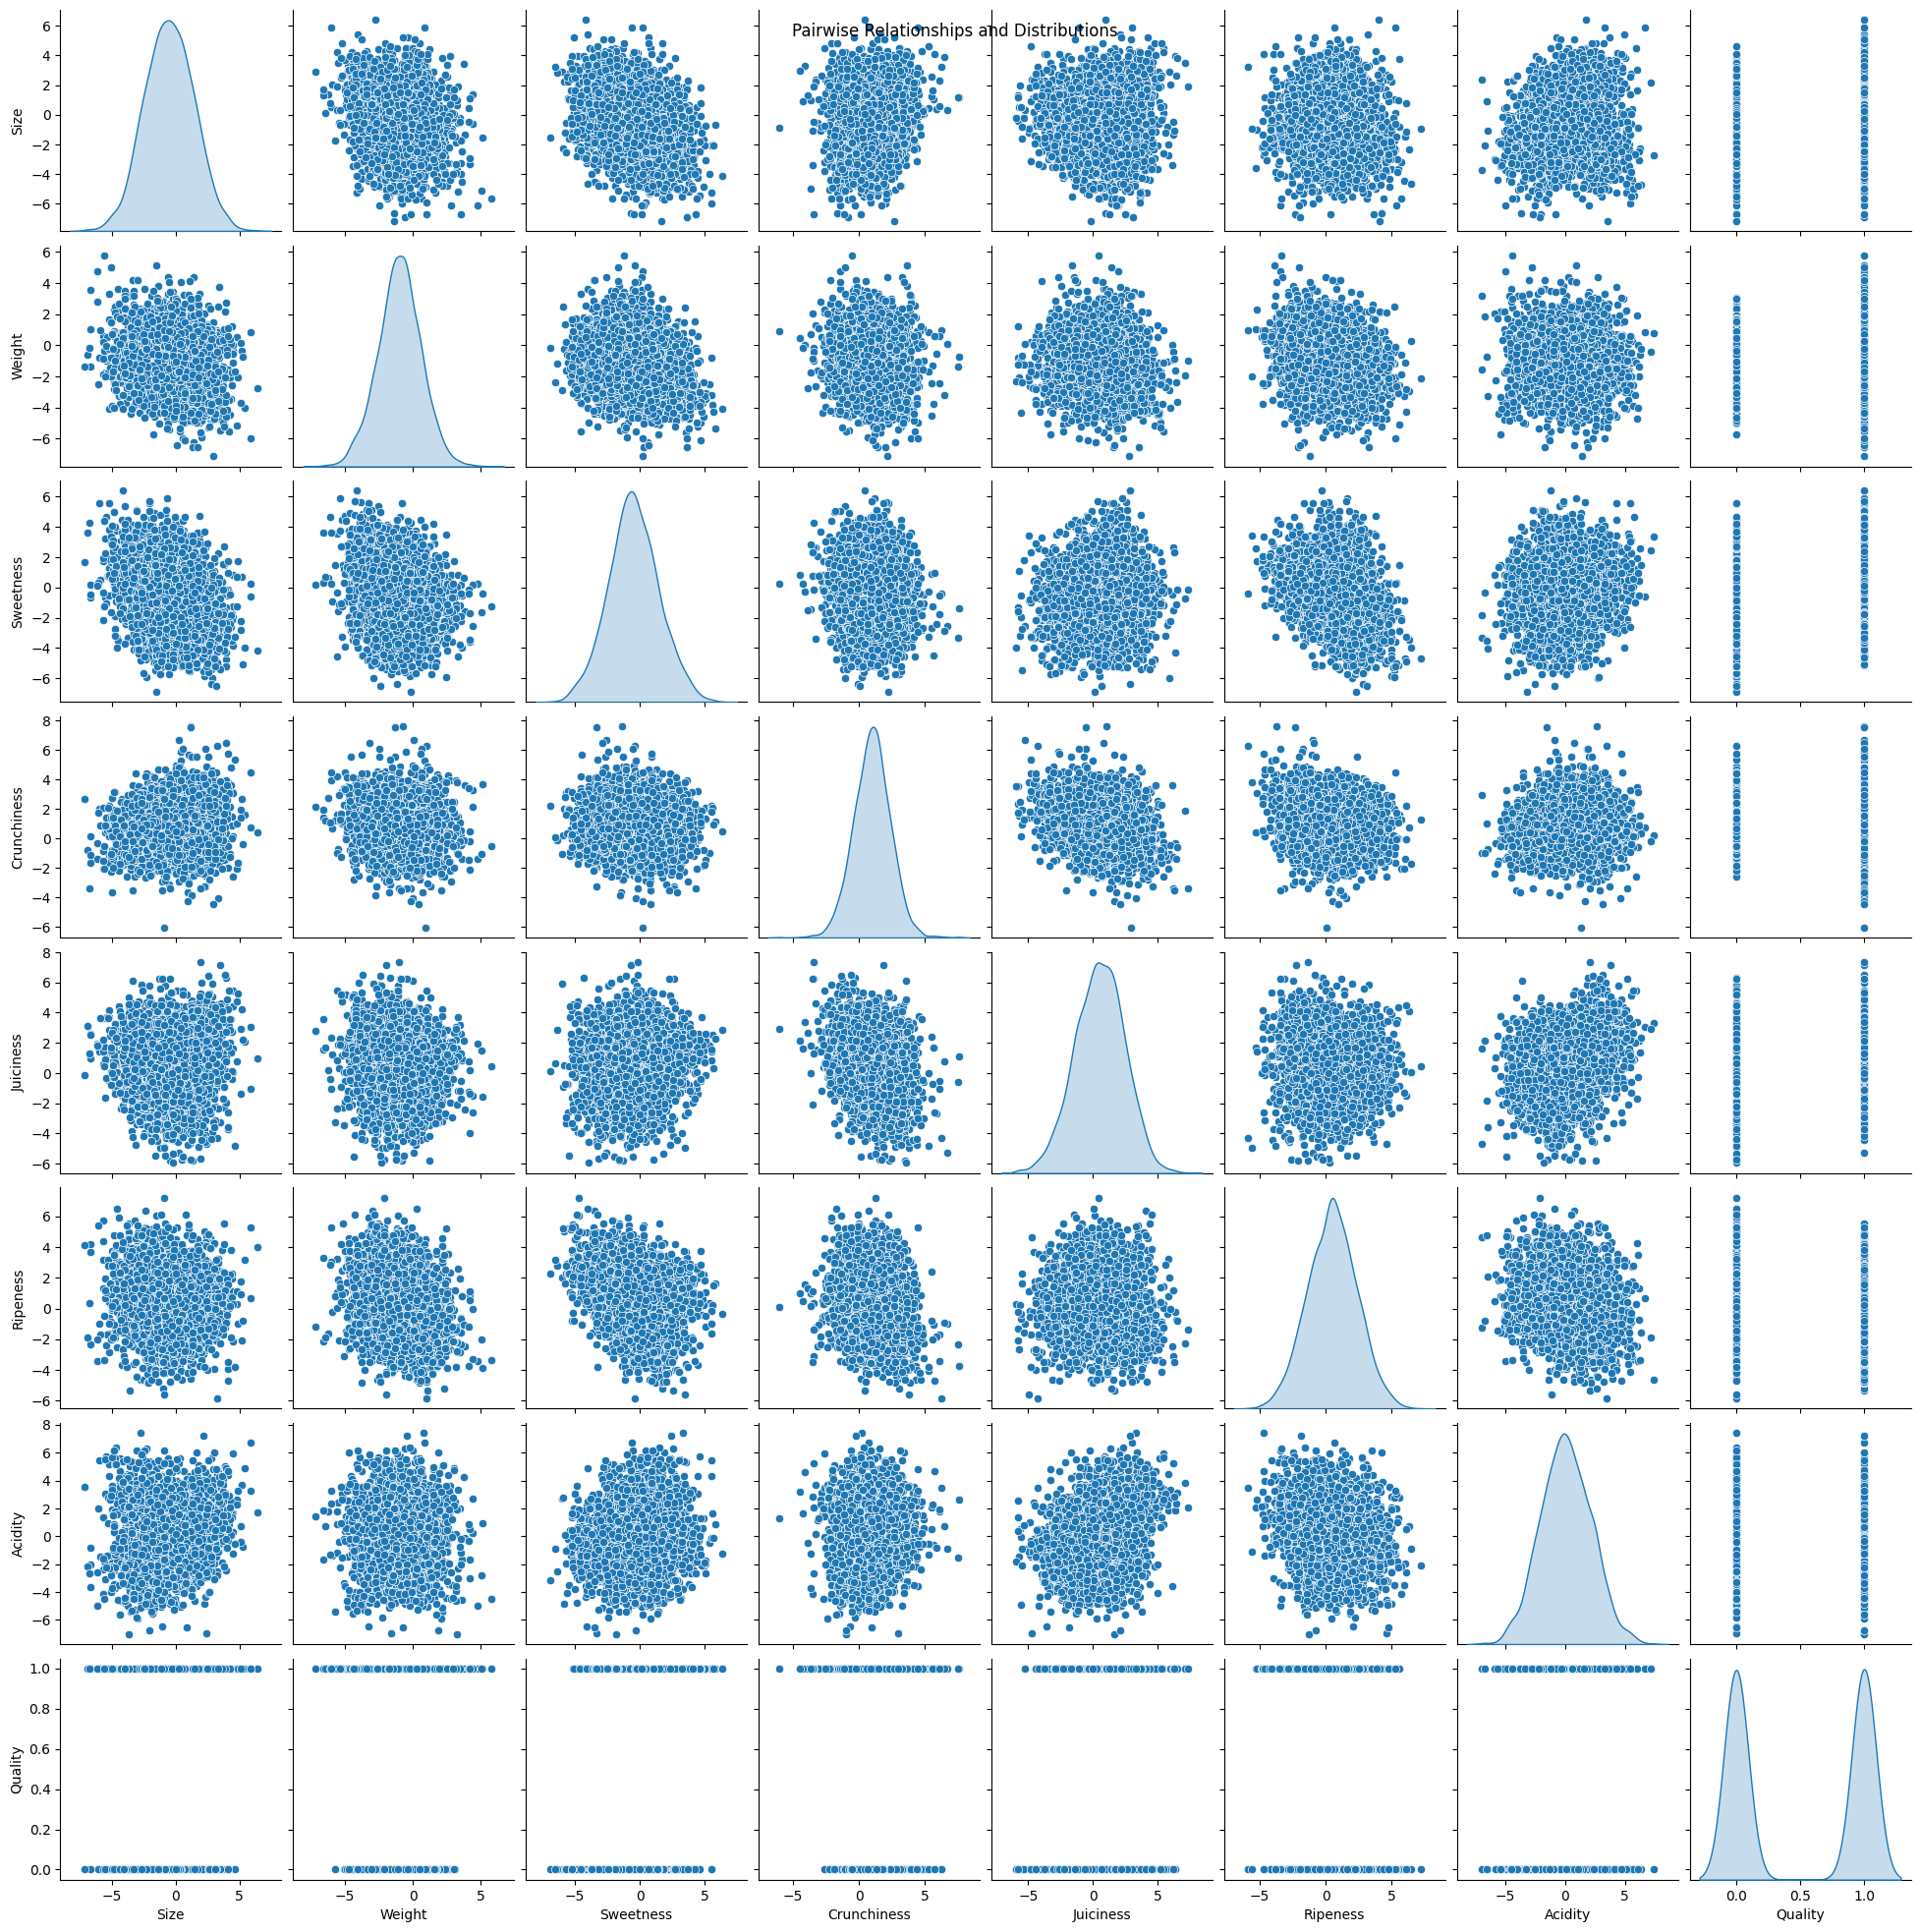

In [16]:
import seaborn as sns

# Assuming df is your DataFrame
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Relationships and Distributions")
plt.show()

# Correlation Heatmap

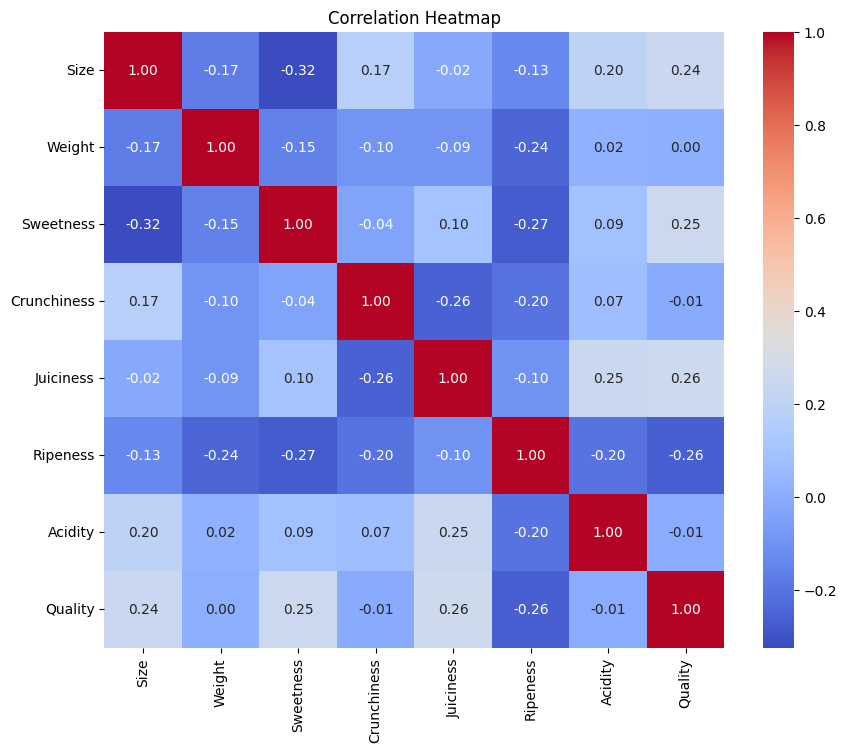

In [17]:
import seaborn as sns

# Assuming df is your DataFrame
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Analysis for each feature according to the label

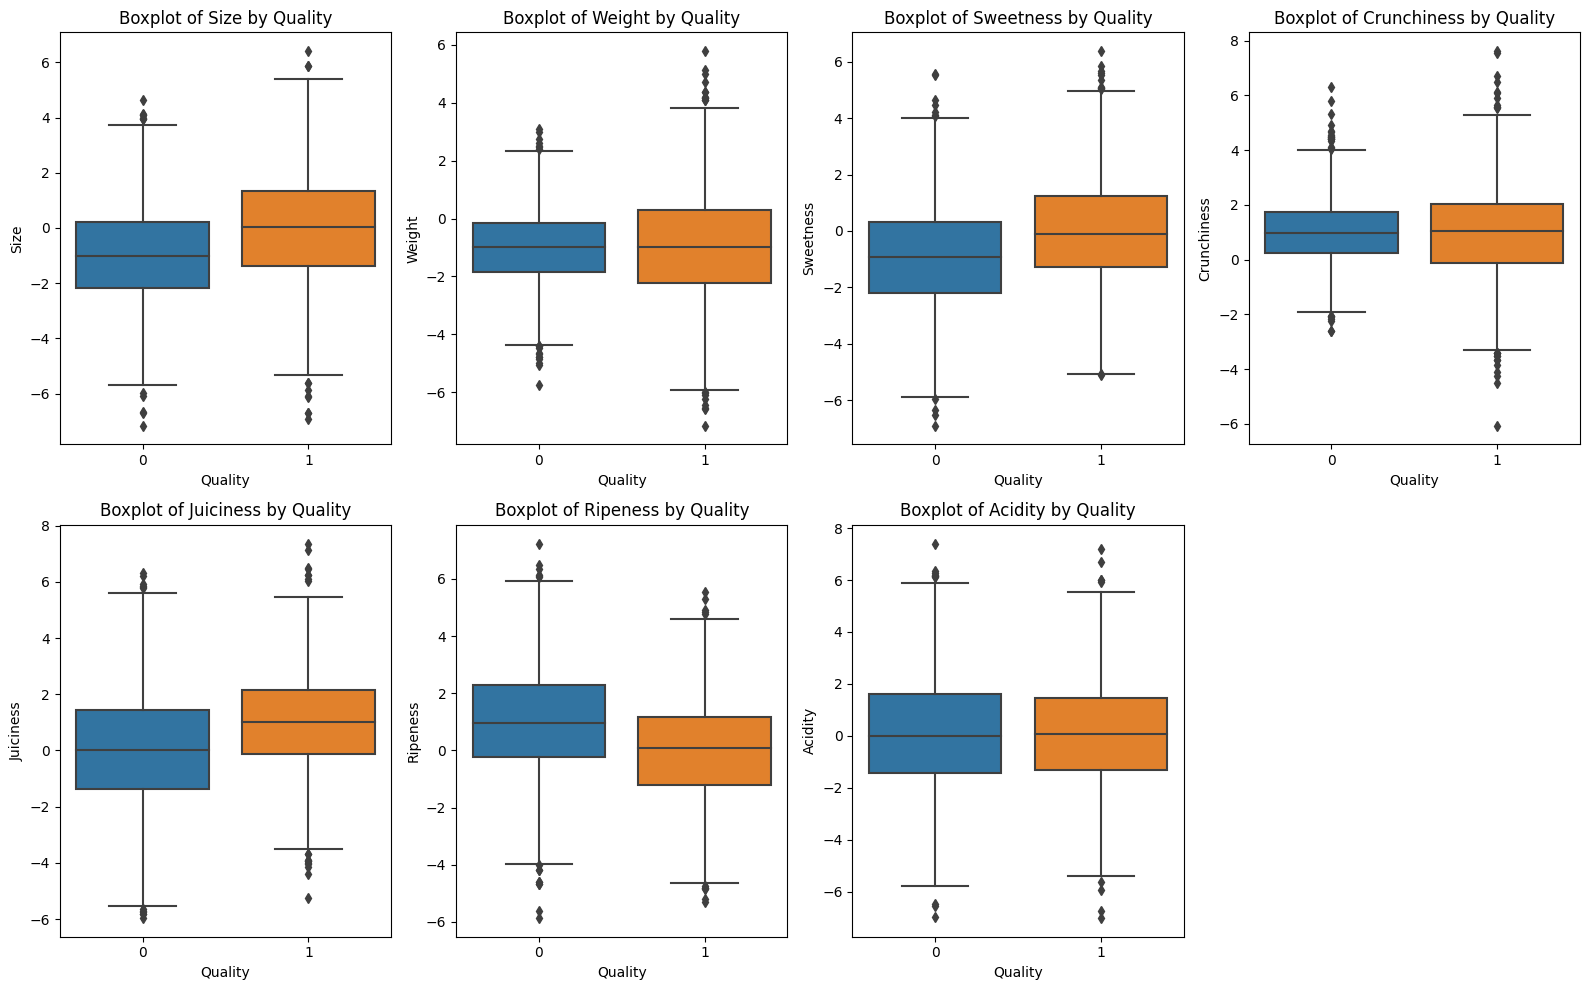

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Quality' is the label column
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

plt.figure(figsize=(16, 10))

for feature in features:
    plt.subplot(2, 4, features.index(feature) + 1)
    sns.boxplot(x='Quality', y=feature, data=df)
    plt.title(f"Boxplot of {feature} by Quality")

plt.tight_layout()
plt.show()

# Check the disparity

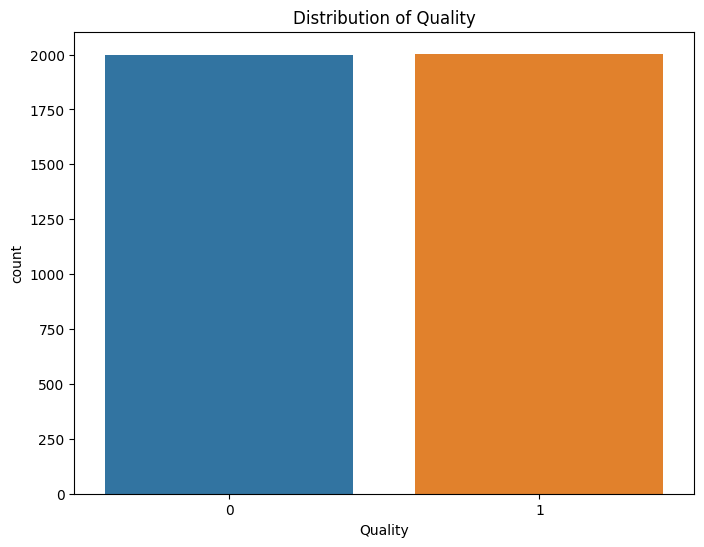

In [19]:
# Assuming df is your DataFrame and 'Quality' is the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df)
plt.title("Distribution of Quality")
plt.show()

# Standardizing the data using  z=(x- mean)/std 


In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame
numeric_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Select only the numeric features for standardization
numeric_data = df[numeric_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
scaled_data = scaler.fit_transform(numeric_data)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())


       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0 -1.798424 -0.950373   2.993421    -1.424150   0.690545 -0.089872 -0.269415
1 -0.359060 -1.154404   2.127698     0.429746   0.176767  0.197020 -0.378997
2  0.109445 -0.225759  -0.652507    -0.946892   1.205422 -0.286156  1.206044
3 -0.079977 -0.800146   0.923916    -0.772399   1.619575 -2.087320  0.338315
4  0.968573 -0.191640   0.044164    -1.096894   1.305025 -0.961548  0.201472


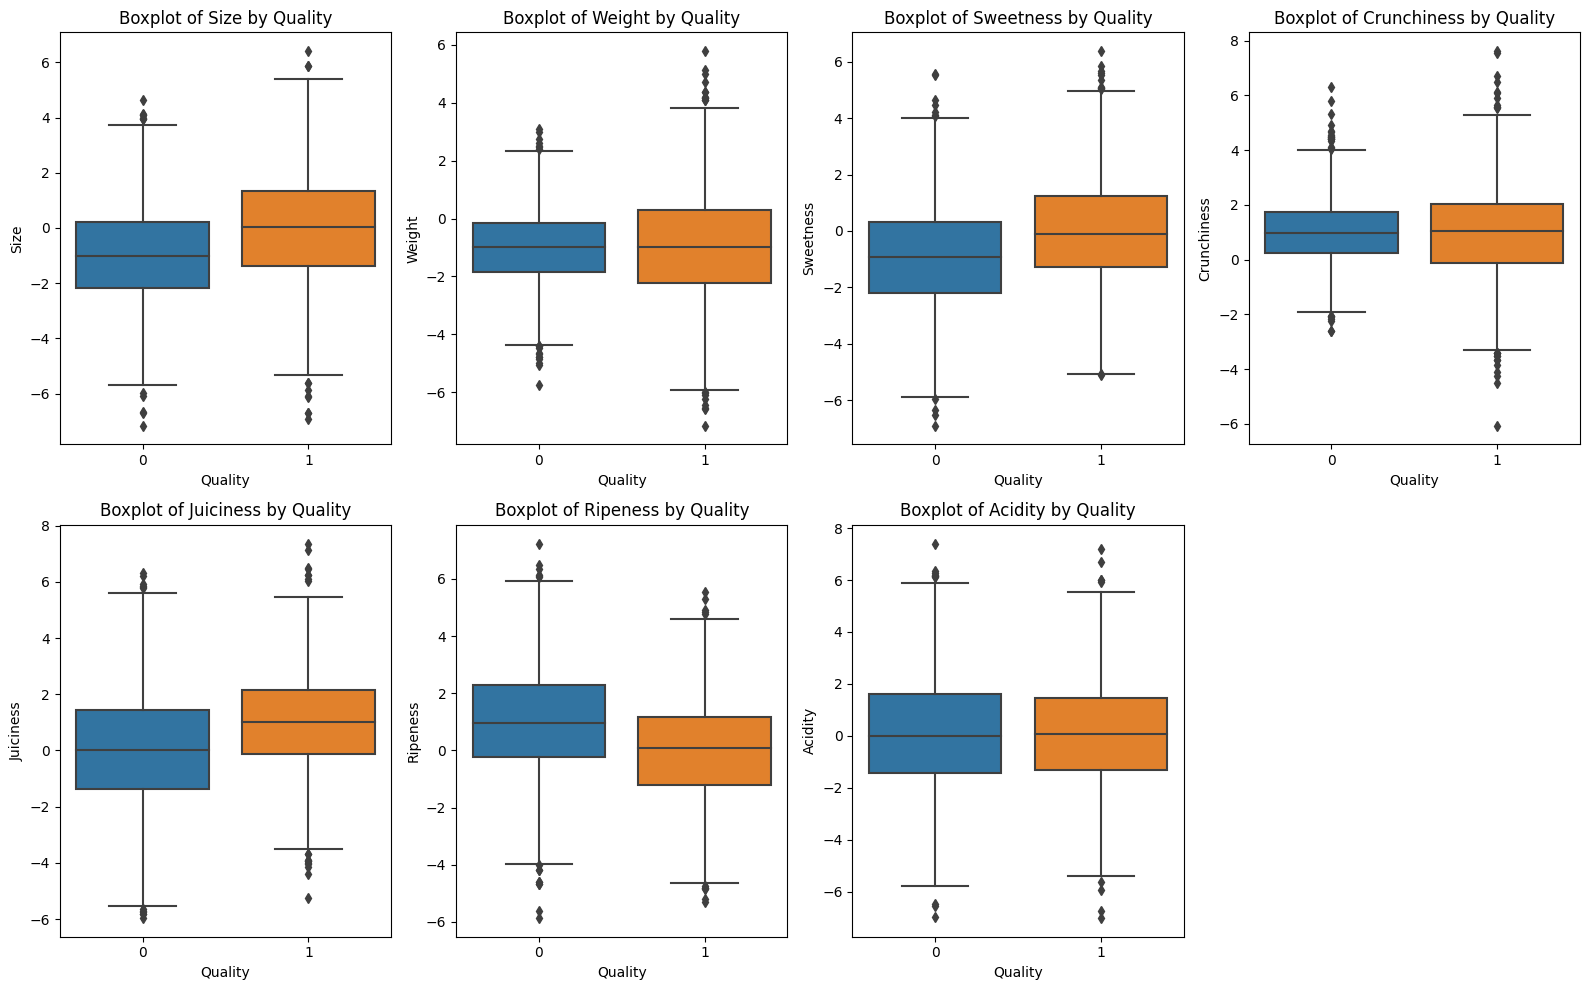

In [21]:
# Assuming df is your DataFrame and 'Quality' is the label column
plt.figure(figsize=(16, 10))

for feature in numeric_features:
    plt.subplot(2, 4, numeric_features.index(feature) + 1)
    sns.boxplot(x='Quality', y=feature, data=df)
    plt.title(f"Boxplot of {feature} by Quality")

plt.tight_layout()
plt.show()

# Outliers detection and suppresion

In [22]:
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, features, threshold=1.5):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Specify the numeric features you want to check for outliers
numeric_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Remove outliers from the DataFrame
df_no_outliers = remove_outliers_iqr(df, numeric_features)

# Display the shape before and after removing outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

Original DataFrame shape: (4000, 8)
DataFrame shape after removing outliers: (3786, 8)


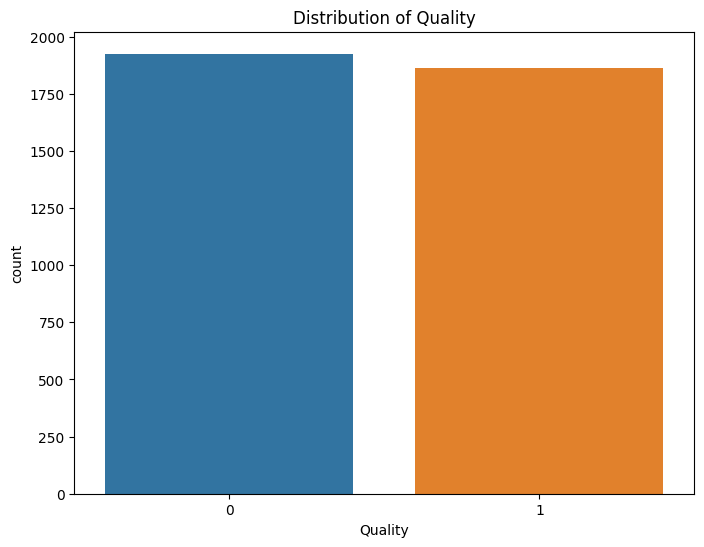

In [23]:
# Assuming df is your DataFrame and 'Quality' is the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df_no_outliers)
plt.title("Distribution of Quality")
plt.show()

# TRAIN DEV TEST SPLIT

In [76]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame after standardization and outlier removal
# X contains the features, y contains the target variable
#Perform the train-test split

X = df_no_outliers.drop('Quality', axis=1)  # Features
y = df_no_outliers['Quality'] 


# Perform the initial train-test split (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and development sets (75% training, 25% dev)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Display the sizes of the resulting sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Development set size: {X_dev.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 2271 samples
Development set size: 757 samples
Test set size: 758 samples


In [25]:
!pip install lazypredict

# LAZY PREDICT MODEL CLASSIFIER

In [26]:
from lazypredict.Supervised import LazyClassifier


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [27]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_dev, y_train, y_dev)

print(models)

100%|██████████| 29/29 [00:03<00:00,  7.82it/s]

[LightGBM] [Info] Number of positive: 1148, number of negative: 1123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2271, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505504 -> initscore=0.022018
[LightGBM] [Info] Start training from score 0.022018
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.90               0.90     0.90      0.90   
ExtraTreesClassifier               0.89               0.89     0.89      0.89   
RandomForestClassifier             0.89               0.89     0.89      0.89   
XGBClassifier                      0.88               0.88     0.88      0.88   
SVC                       

# RandomForestClassifier Fine TUNING

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]



# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)
# Use the random grid to search for best hyperparameters
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  11.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   7.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   8.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   4.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   5.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   3.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.2s
[CV] END bootstrap=False, max_depth=50, 

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  11.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  12.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   8.5s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   6.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  10.8s
[CV] END bootstrap=True, max_depth=70,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  11.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  12.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   8.5s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   6.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  10.8s
[CV] END bootstrap=False, max_depth=9

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   7.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   7.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  12.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   5.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   6.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=False, max_depth=

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  11.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  12.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   5.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   3.8s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   9.0s
[CV] END bootstrap=True, max_depth

In [33]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [38]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [20, 30, 40],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [700, 800, 900, 1000]
}



# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_dev)

# Evaluate the performance of the model
accuracy = accuracy_score(y_pred, y_dev)
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy on the Dev set: {accuracy}")

Best hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
Accuracy on the Dev set: 0.8824306472919419


In [44]:
test_normal = RandomForestClassifier()
test_normal.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Make predictions on the test set
y_pred_normal = test_normal.predict(X_dev)

# Evaluate the performance of the model
accuracy = accuracy_score(y_pred_normal, y_dev)
print(f"Accuracy on the Dev set: {accuracy}")

Accuracy on the Dev set: 0.8837516512549538


# KNC fine tuning

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values for Random Search
random_param_dist = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=knn_classifier, param_distributions=random_param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters from Random Search
best_random_params = random_search.best_params_

In [41]:
best_random_params

{'weights': 'uniform', 'n_neighbors': 15, 'metric': 'euclidean'}

In [43]:
# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_neighbors': [13,15,17],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new KNN classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_dev)

# Evaluate the performance of the model
accuracy = accuracy_score(y_dev, y_pred)
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy on the dev set: {accuracy}")

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Accuracy on the test set: 0.8850726552179656


# XGB FINE TUNING

In [49]:
import xgboost as xgb

In [50]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [53]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = best_xgb_classifier.predict(X_dev)

# Evaluate the performance of the model
accuracy = accuracy_score(y_dev, y_pred_xgb)
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy on the dev set: {accuracy}")

Best hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy on the dev set: 0.8956406869220608


# SVC FINE TUNING

In [54]:
from sklearn.svm import SVC

In [55]:
# Define the SVC classifier
svc_classifier = SVC()

# Define the hyperparameters to tune and their possible values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new SVC classifier with the best hyperparameters
best_svc_classifier = SVC(**best_params)
best_svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = best_svc_classifier.predict(X_dev)

# Evaluate the performance of the model
accuracy = accuracy_score(y_dev, y_pred_svc)
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy on the test set: {accuracy}")

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on the test set: 0.9194187582562747


As we can see SVC classifier is the one working the best so let's show the final result ! 

# ACCURACY SCORE ON TEST SET

In [80]:
y_pred_SVC_test = best_svc_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_SVC_test)

print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.9010554089709762


Let's look at some useful metrics !

In [63]:

from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Confusion MATRIX

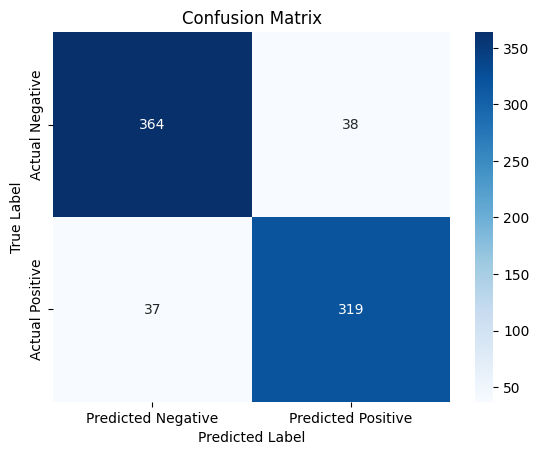

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_true` is the true labels and `y_pred` is the predicted labels
cm = confusion_matrix(y_test, y_pred_SVC_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC CURVE

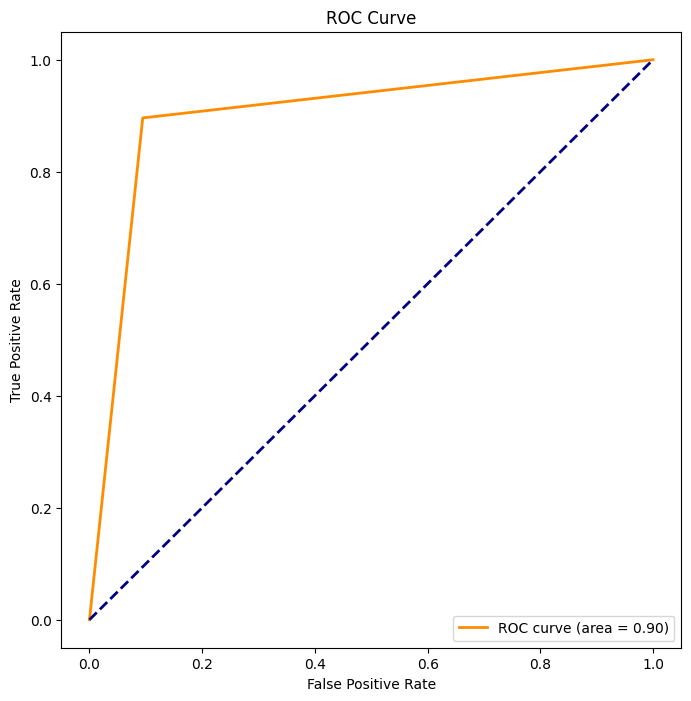

In [66]:

# Assuming `y_true` is the true labels and `y_score` is the decision function or predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_SVC_test)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# PRC

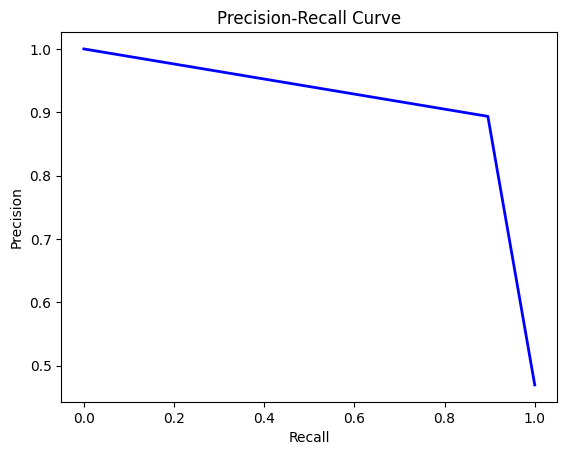

In [67]:
#Assuming `y_true` is the true labels and `y_score` is the decision function or predicted probabilities
precision, recall, _ = precision_recall_curve(y_test, y_pred_SVC_test)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [68]:
from sklearn.metrics import classification_report

# Assuming `y_true` is the true labels and `y_pred` is the predicted labels
report = classification_report(y_test, y_pred_SVC_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       402
           1       0.89      0.90      0.89       356

    accuracy                           0.90       758
   macro avg       0.90      0.90      0.90       758
weighted avg       0.90      0.90      0.90       758



# LEARNING CURVE OF SVC

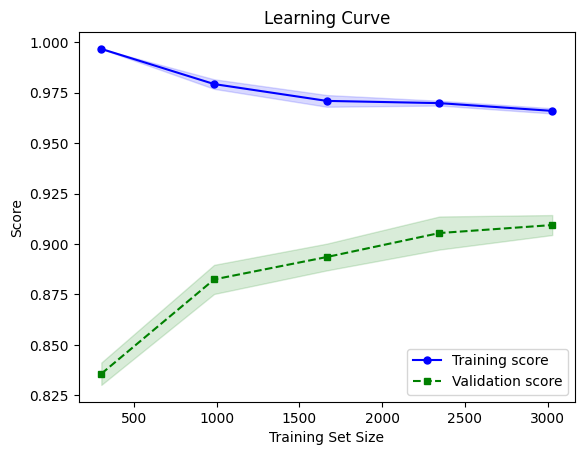

In [70]:
from sklearn.model_selection import learning_curve

# Assuming `model` is your SVM model and `X`, `y` are your data
train_sizes, train_scores, test_scores = learning_curve(best_svc_classifier, X, y, cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()